In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Autocorrelation, and partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf

In [4]:
from global_config import config
import pandas as pd
import numpy as np
import os

import wget

data_dir_mnps = config.get_property('geo_dir')
data_dir      = config.get_property('data_dir')
results_dir   = config.get_property('results_dir')

In [8]:
rt_all = pd.read_csv(os.path.join(results_dir, 'rt_merged_all.csv'), parse_dates=['date']).drop(columns=['Unnamed: 0'])

for region in np.unique(rt_all.region.unique()):
    median_rt = rt_all[rt_all.region==region][["date", "median"]]

,date,median,mean,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90,region,region_id
0,2020-03-24,1.513063,1.529495,1.311866,1.416431,1.476322,1.547980,1.617320,1.798810,Antonio Nariño,15
1,2020-03-25,1.495636,1.510258,1.309288,1.406492,1.463105,1.527859,1.594294,1.752485,Antonio Nariño,15
2,2020-03-26,1.477906,1.490207,1.304210,1.397567,1.445844,1.507121,1.569388,1.716862,Antonio Nariño,15
3,2020-03-27,1.459256,1.469571,1.296481,1.387633,1.428855,1.487886,1.545116,1.676142,Antonio Nariño,15
4,2020-03-28,1.440022,1.448604,1.288049,1.372477,1.410599,1.467383,1.517421,1.639612,Antonio Nariño,15
...,...,...,...,...,...,...,...,...,...,...,...
5783,2021-01-11,0.949362,0.948908,0.881482,0.923642,0.939972,0.959177,0.976471,1.009602,Usme,5
5784,2021-01-12,0.943170,0.941795,0.868603,0.914793,0.932570,0.952907,0.971043,1.007018,Usme,5
5785,2021-01-13,0.936760,0.934971,0.856559,0.906111,0.924999,0.947772,0.966121,1.003874,Usme,5
5786,2021-01-14,0.930519,0.928478,0.845536,0.897244,0.917966,0.941929,0.961821,1.002661,Usme,5


In [11]:
region = 'Chapinero'
median_rt = rt_all[rt_all.region==region][["date", "median"]]


/Users/chaosdonkey06/conda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


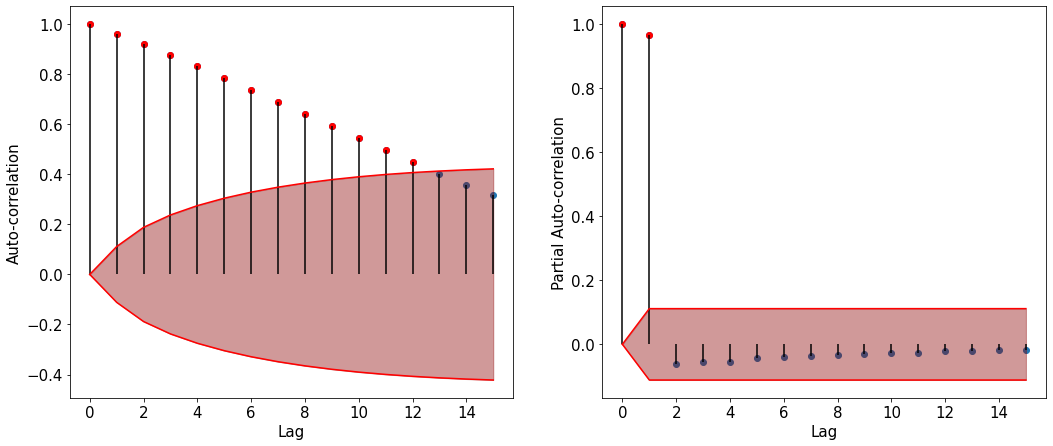

In [32]:
nlags = 15
a = acf(median_rt["median"], nlags=15, alpha=0.05)
idx_keep = (a[0]<= a[1][:,0]-a[0]) + (a[0]>= a[1][:,1]-a[0])

fig, ax = plt.subplots(1, 2, figsize=(17.5, 7.2))

ax[0].scatter(range(nlags+1), a[0],)
ax[0].scatter(np.where(idx_keep)[0], a[0][idx_keep], color='red')
ax[0].vlines(range(nlags+1), [0], a[0], color='k' )
ax[0].fill_between(range(nlags+1), a[1][:,0]-a[0], a[1][:,1]-a[0], color='darkred', alpha=0.4)
ax[0].plot(range(nlags+1), a[1][:,0]-a[0], color='red')
ax[0].plot(range(nlags+1), a[1][:,1]-a[0], color='red')
ax[0].set_xlabel('Lag', fontsize=15)
ax[0].set_ylabel('Auto-correlation', fontsize=15)
ax[0].tick_params(axis='both', labelsize=15)

a = pacf(median_rt["median"], nlags=nlags, alpha=0.05)
idx_keep = (a[0]<= a[1][:,0]-a[0]) + (a[0]>= a[1][:,1]-a[0])
ax[1].scatter(range(nlags+1), a[0],)
ax[1].scatter(np.where(idx_keep)[0], a[0][idx_keep], color='red')
ax[1].vlines(range(nlags+1), [0], a[0], color='k' )
ax[1].fill_between(range(nlags+1), a[1][:,0]-a[0], a[1][:,1]-a[0], color='darkred', alpha=0.4)
ax[1].plot(range(nlags+1), a[1][:,0]-a[0], color='red')
ax[1].plot(range(nlags+1), a[1][:,1]-a[0], color='red')
ax[1].set_xlabel('Lag', fontsize=15)
ax[1].set_ylabel('Partial Auto-correlation', fontsize=15)
ax[1].tick_params(axis='both', labelsize=15)